In [1]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mortality_rate = pd.read_csv("../data/mortality_rate_by_US_state.csv")
temperature_rate = pd.read_csv("../data/model_state.csv")

In [3]:
cancer_rate = mortality_rate.loc[mortality_rate["Cause Name"]=="Cancer"]
cancer_rate = cancer_rate.rename(columns={"Year":"year"})
cancer_rate

,year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
1923,2016,Malignant neoplasms (C00-C97),Cancer,Alabama,10419,174.0
1924,2015,Malignant neoplasms (C00-C97),Cancer,Alabama,10354,175.6
1925,2014,Malignant neoplasms (C00-C97),Cancer,Alabama,10286,177.6
1926,2013,Malignant neoplasms (C00-C97),Cancer,Alabama,10328,182.2
1927,2012,Malignant neoplasms (C00-C97),Cancer,Alabama,10276,185.2
...,...,...,...,...,...,...
2854,2003,Malignant neoplasms (C00-C97),Cancer,Wyoming,943,188.9
2855,2002,Malignant neoplasms (C00-C97),Cancer,Wyoming,859,177.1
2856,2001,Malignant neoplasms (C00-C97),Cancer,Wyoming,923,194.0
2857,2000,Malignant neoplasms (C00-C97),Cancer,Wyoming,868,185.5


In [4]:
cancer_rate = mortality_rate.loc[mortality_rate["Cause Name"]=="Cancer"]
cancer_rate = cancer_rate.rename(columns={"Year":"year"})
cancer_rate

,year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
1923,2016,Malignant neoplasms (C00-C97),Cancer,Alabama,10419,174.0
1924,2015,Malignant neoplasms (C00-C97),Cancer,Alabama,10354,175.6
1925,2014,Malignant neoplasms (C00-C97),Cancer,Alabama,10286,177.6
1926,2013,Malignant neoplasms (C00-C97),Cancer,Alabama,10328,182.2
1927,2012,Malignant neoplasms (C00-C97),Cancer,Alabama,10276,185.2
...,...,...,...,...,...,...
2854,2003,Malignant neoplasms (C00-C97),Cancer,Wyoming,943,188.9
2855,2002,Malignant neoplasms (C00-C97),Cancer,Wyoming,859,177.1
2856,2001,Malignant neoplasms (C00-C97),Cancer,Wyoming,923,194.0
2857,2000,Malignant neoplasms (C00-C97),Cancer,Wyoming,868,185.5


In [5]:
cancer_df = cancer_rate.loc[(cancer_rate["year"]>1999)]
cancer_df

,year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
1923,2016,Malignant neoplasms (C00-C97),Cancer,Alabama,10419,174.0
1924,2015,Malignant neoplasms (C00-C97),Cancer,Alabama,10354,175.6
1925,2014,Malignant neoplasms (C00-C97),Cancer,Alabama,10286,177.6
1926,2013,Malignant neoplasms (C00-C97),Cancer,Alabama,10328,182.2
1927,2012,Malignant neoplasms (C00-C97),Cancer,Alabama,10276,185.2
...,...,...,...,...,...,...
2853,2004,Malignant neoplasms (C00-C97),Cancer,Wyoming,875,171.7
2854,2003,Malignant neoplasms (C00-C97),Cancer,Wyoming,943,188.9
2855,2002,Malignant neoplasms (C00-C97),Cancer,Wyoming,859,177.1
2856,2001,Malignant neoplasms (C00-C97),Cancer,Wyoming,923,194.0


In [6]:
climate_change = pd.read_csv("../data/climdiv_state_year.csv")
climate_df =climate_change.loc[(climate_change["year"]>1999) & (climate_change["year"]<2017)]
climate_df

,fips,year,temp,tempc
105,1,2000,63.566667,17.537037
106,1,2001,63.033333,17.240741
107,1,2002,63.575000,17.541667
108,1,2003,62.733333,17.074074
109,1,2004,63.333333,17.407407
...,...,...,...,...
5992,56,2012,44.791667,7.106481
5993,56,2013,41.675000,5.375000
5994,56,2014,42.125000,5.625000
5995,56,2015,44.158333,6.754630


In [7]:
whole_data = cancer_df.merge(climate_df , how= 'outer', on="year" )
yearly_cancer= whole_data.groupby(whole_data["year"]).sum(["Deaths"])
temperature_yearly = whole_data.groupby(whole_data["year"]).mean(["tempc"])
yearly_cancer_deaths= yearly_cancer[["Deaths"]]
temperature_yearly_change = temperature_yearly[["tempc"]]
annual_change = temperature_yearly_change.merge(yearly_cancer_deaths, on="year")
annual_change

,tempc,Deaths
year,,
2000,11.292535,53096736
2001,11.716917,53161728
2002,11.600309,53498016
2003,11.220004,53462592
2004,11.343364,53173248
2005,11.655768,53693952
2006,12.089796,53749248
2007,11.706597,54036000
2008,11.016011,54285024


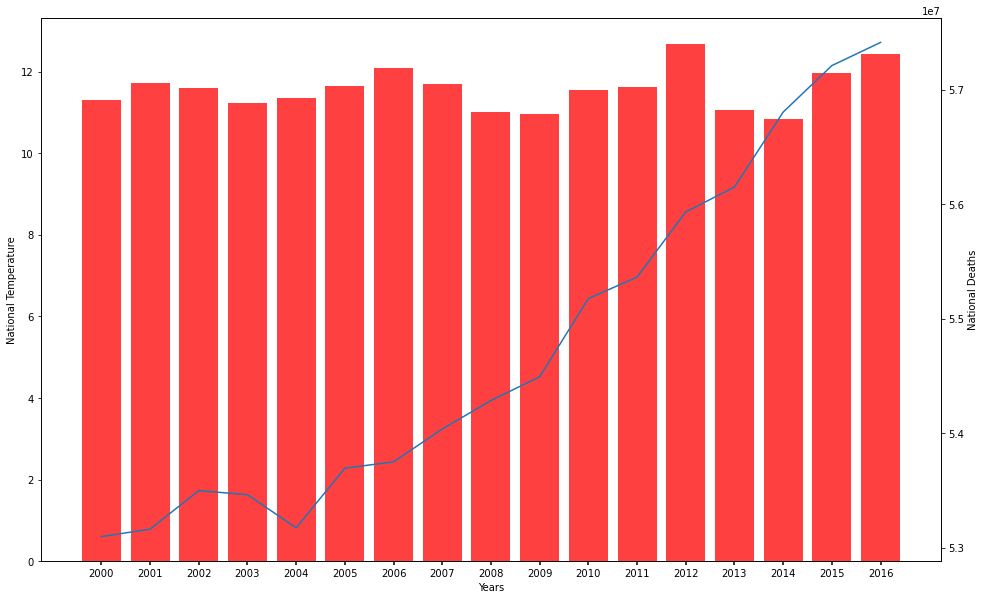

In [9]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
fig.set_figheight(10)
fig.set_figwidth(20)
twin1 = ax.twinx()


ax.bar(annual_change.index, annual_change["tempc"], color="r", label="Temperature",alpha=0.75,tick_label=annual_change.index )

twin1.plot(annual_change.index, annual_change["Deaths"], label="Deaths")


ax.set_xlabel("Years")
ax.set_ylabel("National Temperature")
twin1.set_ylabel("National Deaths")

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='x', **tkw)

plt.savefig("../images/nationwide.png")
plt.show()